In [166]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from pathlib import Path

import matplotlib as plt
import seaborn as sns

In [271]:
PCA_components = 64

USE_GEO = "GEO"

network_type = "vgg16_4096"

standardize_features = True

CITY = "milano"

cities = ['milano', 'bologna', 'firenze', 'palermo', 'torino', 'roma']

In [272]:
def read_res(city):
    if city==None:
        res_name = '../../results/districts/regression/unseen_city/'\
        + str(PCA_components) +  '_' + 'inference.csv'
    else:
        res_name = '../../results/districts/regression/unseen_city/'\
        + city + '_' + str(PCA_components) +  '_' + 'inference.csv'
    
    return pd.read_csv(res_name).rename(columns={"Unnamed: 0":"metric"})

In [273]:
def get_city_vitality_res(city):
    tmp = read_res(city)["label_activity_density"]
    res = {}
#     res["SAT MAE"] = tmp.iloc[0]
#     res["SAT RMSE"] = tmp.iloc[2]
    res["SAT R2"] = tmp.iloc[1]
    return res

In [274]:
def get_all_vitality_res():
    all_res = {}
    for city in cities:
        all_res[city] = get_city_vitality_res(city)
    all_res['all'] = get_city_vitality_res(city=None)
    return pd.DataFrame.from_dict(all_res, orient='index')

In [275]:
def get_baseline():
    res = {'milano': [0.31836817997278966],
             'roma': [0.3577524019400592],
             'bologna': [0.6194773064285527],
             'firenze': [0.1193522875706634],
             'torino': [0.4092227693431335],
             'palermo': [0.4770672249276323],
             'all': [0.38194846785674175]}
    return pd.DataFrame.from_dict(res).T.rename(columns={0:"Pop. Dens. R2"})

In [276]:
def get_baseline_plus_sat(city=None):
    if city==None:
        res_name = '../../results/districts/regression/unseen_city/'\
        + str(PCA_components) +  '_' + 'pop_dens_baseline_inference.csv'
    else:
        res_name = ("../../results/districts/regression/unseen_city/" \
            + city + "_" + str(PCA_components) + "_baseline_inference.csv")
    
    tmp = pd.read_csv(res_name).rename(columns={"Unnamed: 0":"metric"})
    
    tmp = tmp["label_activity_density"]
    res = {}
#     res["Pop. Dens. + SAT MAE"] = tmp.iloc[0]
#     res["Pop. Dens. + SAT RMSE"] = tmp.iloc[2]
    res["Pop. Dens. + SAT R2"] = tmp.iloc[1]
    return res

In [277]:
def get_all_baseline_plus_sat():
    all_res = {}
    for city in cities:
        all_res[city] = get_baseline_plus_sat(city)
    all_res['all'] = get_baseline_plus_sat(city=None)
    return pd.DataFrame.from_dict(all_res, orient='index')

In [278]:
get_baseline()

,Pop. Dens. R2
milano,0.318368
roma,0.357752
bologna,0.619477
firenze,0.119352
torino,0.409223
palermo,0.477067
all,0.381948


In [279]:
get_all_baseline_plus_sat()

,Pop. Dens. + SAT R2
all,0.427000
bologna,0.385537
firenze,0.216030
milano,0.213698
palermo,0.289216
roma,0.306913
torino,0.296266


In [280]:
get_all_vitality_res()

,SAT R2
all,0.316000
bologna,0.204551
firenze,0.325250
milano,0.430459
palermo,0.265539
roma,0.160839
torino,0.354320


In [281]:
def plot_res():
    
    fig, ax = plt.pyplot.subplots(figsize=(15,5))
    sns.set_style("white")
    sns.set_context("paper")

    df = get_baseline()
    df = df.join(get_all_vitality_res())
    df = df.join(get_all_baseline_plus_sat())
    
    
    df = df.sort_index(ascending=False)


    colors = ["lightskyblue", "cadetblue", "teal", "rosybrown"]


    df.plot.bar(ax=ax, edgecolor = "white", color=colors, alpha=0.777, capsize=3)


    ax.set_xlabel('')

    ax.set_ylim(0,0.7)

    for item in ([ax.xaxis.label, ax.yaxis.label] +
                 ax.get_yticklabels() + ax.get_xticklabels()):
                item.set_fontsize(18)
                item.set_weight('bold')
                
#     for p in ax.patches:
#         ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

    x_offset = -0.08
    y_offset = 0.015
    for p in ax.patches:
        b = p.get_bbox()
        val = "{:.2f}".format(b.y1 + b.y0).lstrip('0')        
        ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset), fontsize=15, fontweight="bold")
    
#     plt.axhline(y=0.5, ls='--', color='red')

    labels = [tick.get_text() for tick in ax.get_yticklabels()]

    l = plt.pyplot.legend(bbox_to_anchor=(1.0, 1.0), prop={'size':16, 'weight':'bold'})
#     l.draw_frame(False)

    plt.pyplot.axvline(x=5.5, ls='--', color='gray')


    plt.pyplot.tight_layout()

    plt.pyplot.savefig('../../results/districts/regression/fig/reg_per_city.png', dpi=100)

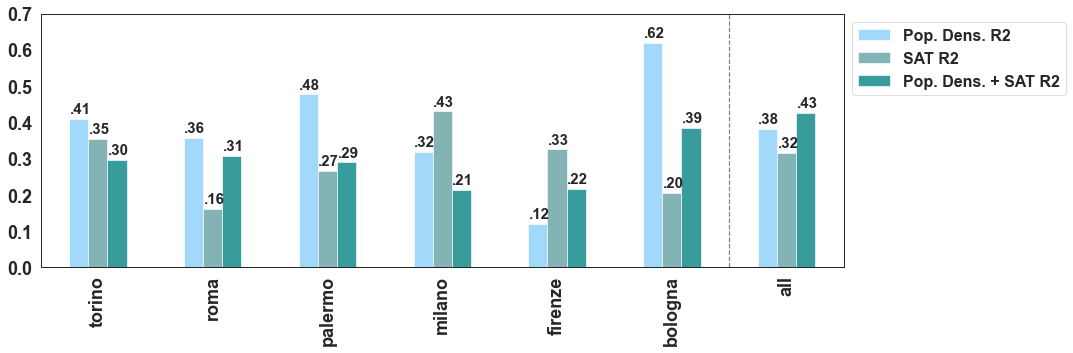

In [282]:
plot_res()

In [283]:
def get_just_baseline(city=None):
    if city==None:
        res_name = '../../results/districts/regression/unseen_city/'\
        + str(64) +  '_' + 'pop_dens_baseline_inference.csv'
    else:
        res_name = ("../../results/districts/regression/unseen_city/" \
            + city + "_" + str(PCA_components) + "_just_baseline_inference.csv")
    
    tmp = pd.read_csv(res_name).rename(columns={"Unnamed: 0":"metric"})
    
    tmp = tmp["label_activity_density"]
    res = {}
#     res["Pop. Dens. + SAT MAE"] = tmp.iloc[0]
#     res["Pop. Dens. + SAT RMSE"] = tmp.iloc[2]
    res["Pop. Dens. R2"] = tmp.iloc[1]
    return res

In [284]:
def get_all_just_baseline():
    all_res = {}
    for city in cities:
        all_res[city] = get_just_baseline(city)
    all_res['all'] = get_just_baseline(city=None)
    return pd.DataFrame.from_dict(all_res, orient='index')

In [285]:
get_all_just_baseline()

,Pop. Dens. R2
all,0.427000
bologna,0.336120
firenze,-0.176743
milano,0.076141
palermo,0.386953
roma,0.247658
torino,0.360231


In [257]:
def plot_res_v2():
    
    fig, ax = plt.pyplot.subplots(figsize=(15,5))
    sns.set_style("white")
    sns.set_context("paper")

    df = get_all_just_baseline()
    df = df.join(get_all_vitality_res())
    df = df.join(get_all_baseline_plus_sat())
    
    
    df = df.sort_index(ascending=False)


    colors = ["lightskyblue", "cadetblue", "teal", "rosybrown"]


    df.plot.bar(ax=ax, edgecolor = "white", color=colors, alpha=0.777, capsize=3)


    ax.set_xlabel('')

    ax.set_ylim(0,0.55)

    for item in ([ax.xaxis.label, ax.yaxis.label] +
                 ax.get_yticklabels() + ax.get_xticklabels()):
                item.set_fontsize(18)
                item.set_weight('bold')
                
#     for p in ax.patches:
#         ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

    x_offset = -0.08
    y_offset = 0.015
    for p in ax.patches:
        b = p.get_bbox()
        val = "{:.2f}".format(b.y1 + b.y0).lstrip('0')        
        ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset), fontsize=15, fontweight="bold")
    
#     plt.axhline(y=0.5, ls='--', color='red')

    labels = [tick.get_text() for tick in ax.get_yticklabels()]

    l = plt.pyplot.legend(bbox_to_anchor=(1.0, 1.0), prop={'size':16, 'weight':'bold'})
#     l.draw_frame(False)

    plt.pyplot.axvline(x=5.5, ls='--', color='gray')


    plt.pyplot.tight_layout()

    plt.pyplot.savefig('../../results/districts/regression/fig/reg_per_city_v2.png', dpi=100)

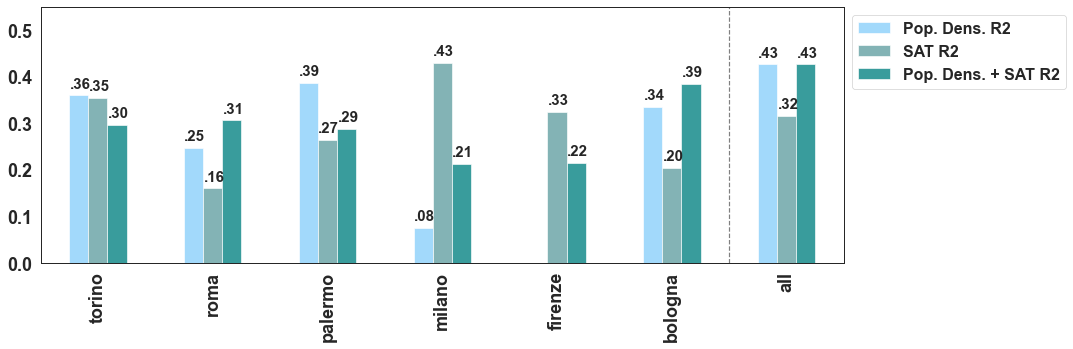

In [258]:
plot_res_v2()